In [1]:
#Import libraries & data

exec(open("../python/nb_setup.py").read())#Is there a better way to do this?

from IPython.core.display import display, HTML
from matplotlib.pyplot import *
style.use('../mplstyles/stylelib/standard.mplstyle')


from tqdm.notebook import tqdm
from scipy.optimize import fsolve
from scipy.special import erf
from scipy.interpolate import CubicSpline
import pickle as pkl
import sys
sys.path.append('../python')
import R68_yield as Yield
import R68_spec_tools as spec
import R68_plot_tools as pt
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.patches as mpatches

#Set up notebook and load some R68 constants (V, eps, etc.)
from constants import *

/var/folders/vn/rb46_y0s1tl360t6yzw8bjgr0000gn/T/ipykernel_99638/495547552.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


dict_keys(['xx', 'yy', 'ex', 'ey'])


In [2]:
#Function Definitions

#Turns out we need the helper functions to still be defined since the stored samplers rely on them.
#Don't think it matters if they're exactly the same as what was used, since we don't use them here.
def Fit_helper(theta):
    return calc_log_prob(model='Sor', theta=theta, theta_bounds=((0,1),(0,3e-2),(0,10),(0,5)),
                         spec_bounds=(5,101), likelihood='Pois')

def ERtoNR(ER,Y,V,eps):
    func = lambda NR : NR-ER*(1+V/eps)/(1+Y.calc(NR)*V/eps)
    NR_guess = ER
    return fsolve(func, NR_guess)

def NRtoER(NR,Y,V,eps):
    return NR*(1+Y.calc(NR)*V/eps)/(1+V/eps)

In [3]:
#Now run Sorensen

model_label='Sorensen'
fnames=['data/mcmc_Sor_128walk_50kstep_SNorm_v3.pkl',
        'data/mcmc_Sor_128walk_50kstep_SNorm_v4.pkl']

mcmc_datas=[]
for fname in fnames:
    with open(fname,'rb') as file:
        mcmc_datas.append(pkl.load(file))
RQss=[]
for datai in mcmc_datas:
    RQss.append(datai['RQs'])

In [4]:
#don't vectorize the function below. It already is, vectorizing will lead to bug https://github.com/numpy/numpy/issues/8758
#instead be sure to use np array only for argument!!
ySor = lambda E : Yield.ySor(E,0.151,1.96e-3) 

Et = np.asarray([33.,33,33,33,33,33,500,500,500,500,500,500,500,500,500,500.0,5000.0,500.0,500,500,500,500,500,500,500,6500.0,6500.0])
print(Et)
print(ySor(Et))

[  33.   33.   33.   33.   33.   33.  500.  500.  500.  500.  500.  500.
  500.  500.  500.  500. 5000.  500.  500.  500.  500.  500.  500.  500.
  500. 6500. 6500.]
[0.         0.         0.         0.         0.         0.
 0.03458463 0.03458463 0.03458463 0.03458463 0.03458463 0.03458463
 0.03458463 0.03458463 0.03458463 0.03458463 0.25849808 0.03458463
 0.03458463 0.03458463 0.03458463 0.03458463 0.03458463 0.03458463
 0.03458463 0.27455815 0.27455815]


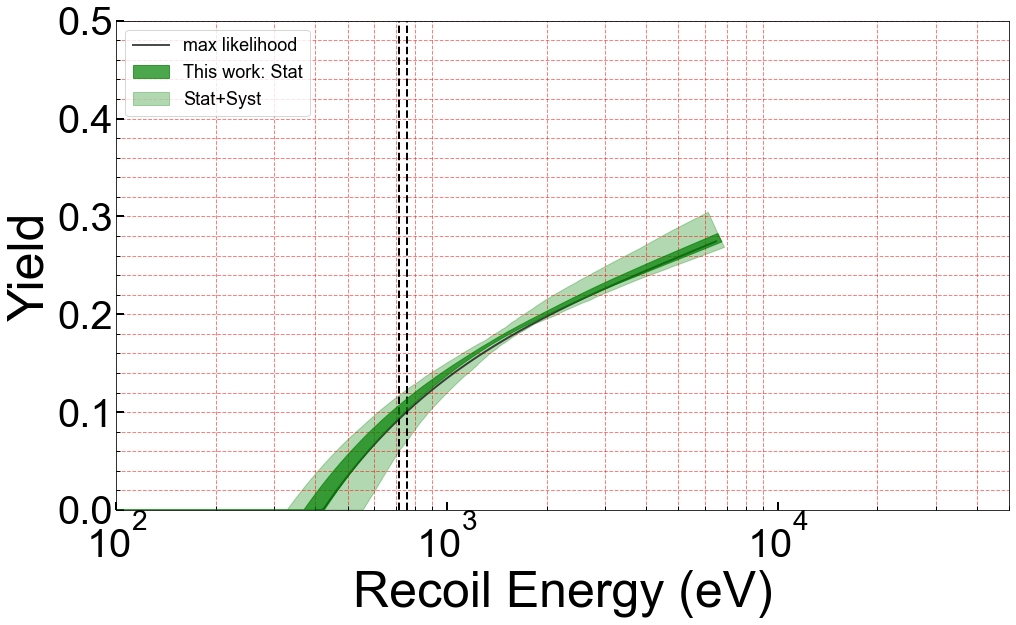

In [46]:
plt.figure(figsize=(16,9))

plot_fill_colors=['g','g']
plot_alphas=[0.7,0.3]
plot_zorders=[2,1,0]
plot_labels=['This work: Stat','Stat+Syst']#,'+BurstSyst']

vEr = np.linspace(400,6500,1000)
#print(ySor(vEr))

plt.plot(vEr,ySor(vEr),label="max likelihood",alpha=0.7,color='k',linewidth=2)

plt.axvline(754,color='k',linestyle="--")
plt.axvline(715,color='k',linestyle="--")
plt.grid(color='r', linestyle='--', linewidth=1,axis="y",which="both",alpha=0.5)
plt.grid(color='r', linestyle='--', linewidth=1,axis="x",which="Minor",alpha=0.5)

for i,RQi in enumerate(RQss):
    Er_Ycalc_plot=np.concatenate((RQi['Er_Ycalc'][0][:1],RQi['Er_Ycalc'][1],RQi['Er_Ycalc'][0][-1:],RQi['Er_Ycalc'][2][::-1]))
    Ydist_plot=np.concatenate((RQi['Ydist'][0][:1],RQi['Ydist'][1],RQi['Ydist'][0][-1:],RQi['Ydist'][2][::-1]))

    plt.fill(Er_Ycalc_plot,Ydist_plot,color=plot_fill_colors[i],zorder=plot_zorders[i], alpha=plot_alphas[i], label=plot_labels[i])

plt.ylabel("Yield")
plt.xlabel("Recoil Energy (eV)")
#plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
#plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.xlim([100,50000])
plt.ylim([0,0.5])
plt.xscale('log')

plt.legend(fontsize=18,loc='upper left')
plt.show()



In [6]:
#https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [40]:




for i,RQi in enumerate(RQss):
    Er_Ycalc_plot=np.concatenate((RQi['Er_Ycalc'][0][:1],RQi['Er_Ycalc'][1],RQi['Er_Ycalc'][0][-1:],RQi['Er_Ycalc'][2][::-1]))
    Ydist_plot=np.concatenate((RQi['Ydist'][0][:1],RQi['Ydist'][1],RQi['Ydist'][0][-1:],RQi['Ydist'][2][::-1]))
    
    if(i==0):
      tight_band=Er_Ycalc_plot
      ytight=Ydist_plot
      cY = ytight<0
      ytight[cY]=0
    else:
      loose_band=Er_Ycalc_plot
      yloose=Ydist_plot
      cY = yloose<0
      yloose[cY]=0
    
    #print(np.shape(Er_Ycalc_plot))
    #print(np.shape(Ydist_plot))
    

#extract the tight band energies and yields on the high and low side
#vEr is the vector of energies corresponding to those high/low yields
vEr=tight_band[1001:2002]
vEl=np.zeros(np.shape(vEr))
vEmid=np.zeros(np.shape(vEr))
vEh=np.zeros(np.shape(vEr))
vY=np.zeros(np.shape(vEr))
ytight_low = ytight[0:1001]
ytight_high = ytight[1001:2002] 

#because of how the polygon is encoded vEr and ytight_high need
#to be flipped
vEr=np.flip(vEr)
ytight_high=np.flip(ytight_high)


#get the mid point yield at a particular energy
mid = (ytight_low+ytight_high)/2.0

#calculate the highest and lowest energies that intersect the yield bands at
#a particular yield 
for i,Er in enumerate(vEr):
    vY[i] = ySor(Er)
    Y0,j = find_nearest(ySor(vEr),vY[i])
    vEmid[i] = vEr[j]
    if i==612:
       print(ySor(vEr))
       print(vY[i],j,Er,vEr[j],Y0,ySor(Er))
    #print(i,vY[i])
    Y,j = find_nearest(ytight_low,vY[i])
    vEh[i] = vEr[j]
    if i==612:
       print(j)
    Y,j = find_nearest(ytight_high,vY[i])
    if i==612:
       print(j)
    vEl[i] = vEr[j]

print(np.shape(vEh))
print(np.shape(vEl))
print(vEr[450])
print(ySor(450))
print(find_nearest(ytight_high,ySor(450)))
print("{0:08.4f}\t{1:08.4f}\t{2:08.4f}".format(vEl[612],vEmid[612],vEh[612]))

print(np.shape(ytight_high))
print(np.shape(ytight_low))
 
mid = (ytight_low+ytight_high)/2.0

print(np.shape(mid))

print(np.shape(vEr))
print(vEr[1000])
print(ySor(754.28))
print(vEr[586],vEr[599])
print(ytight_high[586])
print(ytight_low[599])
Y,j = find_nearest(ytight_low,0.1003)
print(Y,j)
Y,j = find_nearest(ytight_high,0.1003)
print(Y,j)
print(ytight_low[580:602])
print(vEr[580:602])
print(ytight_low[999])
print(ytight_high[999])
#for i,Er in enumerate(vEr):
  
  #if(tb>367):
  #if(tb>328):
  #print("{0:08.4f}\t{1:05.4f}\t{2:05.4f}\t{3:05.4f}".format(Er,ytight_low[i],ytight_high[i],np.abs(ytight_high[i])))


[0.         0.         0.         ... 0.27495638 0.27534592 0.27625684]
0.10029231122069049 612 754.283600734165 754.283600734165 0.10029231122069049 0.10029231122069049
599
586
(1001,)
(1001,)
452.7412985958597
0.013894784086286777
(0.013843896035081602, 372)
679.6434	754.2836	715.2805
(1001,)
(1001,)
(1001,)
(1001,)
6682.177393411446
0.10029166407612215
679.6434217349166 715.28045814681
0.10053768241185886
0.10026290576700576
0.10026290576700576 599
0.10053768241185886 586
[0.09048752 0.09099591 0.09150487 0.09201439 0.09252575 0.09303807
 0.09355094 0.09406434 0.09457826 0.0950927  0.09560763 0.09612306
 0.09663897 0.09715535 0.09767219 0.09818948 0.09870721 0.09922536
 0.09974393 0.10026291 0.10078228 0.10130204]
[664.27464292 666.79070346 669.32475864 671.87693264 674.44735047
 677.03613794 679.64342173 682.26932935 684.91398913 687.57753027
 690.26008282 692.9617777  695.68274668 698.42312242 701.18303843
 703.96262913 706.7620298  709.58137666 712.42080677 715.28045815
 718.1604

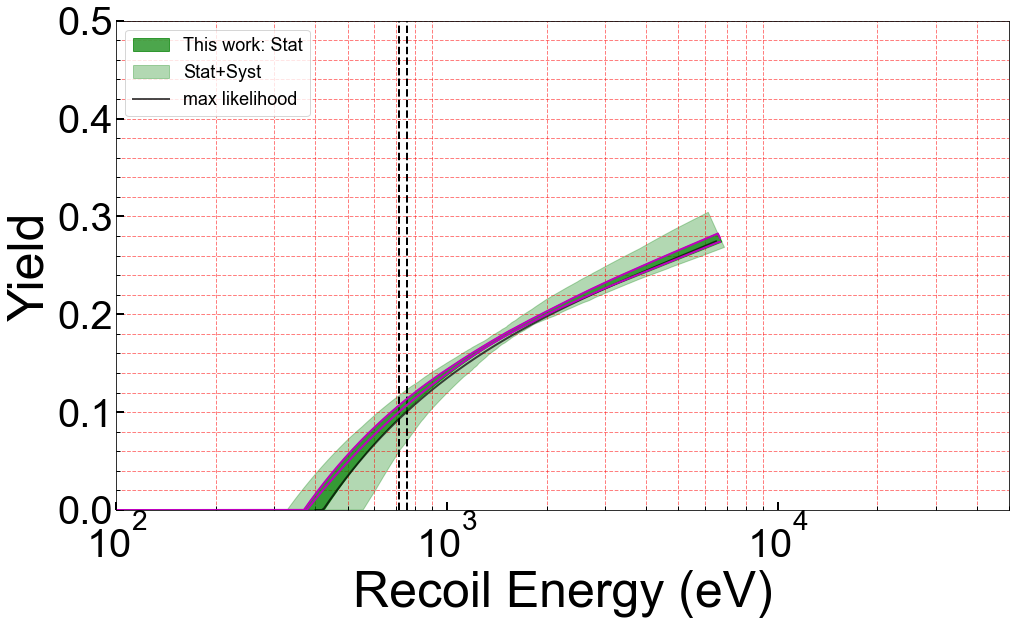

In [50]:
plt.figure(figsize=(16,9))

plot_fill_colors=['g','g']
plot_alphas=[0.7,0.3]
plot_zorders=[2,1,0]
plot_labels=['This work: Stat','Stat+Syst']#,'+BurstSyst']

vEr = np.linspace(400,6500,1000)
#print(ySor(vEr))



plt.axvline(754,color='k',linestyle="--")
plt.axvline(715,color='k',linestyle="--")
plt.grid(color='r', linestyle='--', linewidth=1,axis="y",which="both",alpha=0.5)
plt.grid(color='r', linestyle='--', linewidth=1,axis="x",which="Minor",alpha=0.5)

for i,RQi in enumerate(RQss):
    Er_Ycalc_plot=np.concatenate((RQi['Er_Ycalc'][0][:1],RQi['Er_Ycalc'][1],RQi['Er_Ycalc'][0][-1:],RQi['Er_Ycalc'][2][::-1]))
    Ydist_plot=np.concatenate((RQi['Ydist'][0][:1],RQi['Ydist'][1],RQi['Ydist'][0][-1:],RQi['Ydist'][2][::-1]))

    plt.fill(Er_Ycalc_plot,Ydist_plot,color=plot_fill_colors[i],zorder=plot_zorders[i], alpha=plot_alphas[i], label=plot_labels[i])

plt.plot(vEr,ySor(vEr),label="max likelihood",alpha=0.7,color='k')
plt.plot(np.flip(tight_band[1001:2002]),ytight_high,color="m",linewidth=2)
plt.plot(np.flip(tight_band[1001:2002]),ytight_low,color="m",linewidth=2)
    
plt.ylabel("Yield")
plt.xlabel("Recoil Energy (eV)")
#plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
#plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.xlim([100,50000])
plt.ylim([0,0.5])
plt.xscale('log')

plt.legend(fontsize=18,loc='upper left')
plt.show()

In [8]:
#let's do it in close to the xml format

print("\t<data-format>Mathematica</data-format>")
print("\t<data-values>")
print("\t{")

for i,Er in enumerate(vEr):
  
    print("\t{{{0:08.4f},{1:05.4f}}},".format(Er,ySor(Er)))
          
          
print("\t}")
print("\t<data-values>")

	<data-format>Mathematica</data-format>
	<data-values>
	{
	{033.8947,0.0000},
	{034.1536,0.0000},
	{034.4145,0.0000},
	{034.6773,0.0000},
	{034.9421,0.0000},
	{035.2090,0.0000},
	{035.4779,0.0000},
	{035.7489,0.0000},
	{036.0219,0.0000},
	{036.2970,0.0000},
	{036.5743,0.0000},
	{036.8536,0.0000},
	{037.1351,0.0000},
	{037.4187,0.0000},
	{037.7045,0.0000},
	{037.9924,0.0000},
	{038.2826,0.0000},
	{038.5750,0.0000},
	{038.8696,0.0000},
	{039.1665,0.0000},
	{039.4656,0.0000},
	{039.7670,0.0000},
	{040.0708,0.0000},
	{040.3768,0.0000},
	{040.6852,0.0000},
	{040.9959,0.0000},
	{041.3090,0.0000},
	{041.6245,0.0000},
	{041.9424,0.0000},
	{042.2628,0.0000},
	{042.5856,0.0000},
	{042.9108,0.0000},
	{043.2385,0.0000},
	{043.5688,0.0000},
	{043.9015,0.0000},
	{044.2368,0.0000},
	{044.5747,0.0000},
	{044.9151,0.0000},
	{045.2582,0.0000},
	{045.6038,0.0000},
	{045.9521,0.0000},
	{046.3031,0.0000},
	{046.6567,0.0000},
	{047.0131,0.0000},
	{047.3721,0.0000},
	{047.7339,0.0000},
	{048.0985,0.0000},
	{